# **Importing the libraries**

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# **Data Collection and Processing**

In [391]:
df = pd.read_csv('/content/sample_data/heart_disease_data.csv')

In [392]:
# print first 5 rows of the dataset
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [393]:
# print last 5 rows of the dataset
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [394]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [395]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [396]:
# checking for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [397]:
# statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Correlation**

<Axes: >

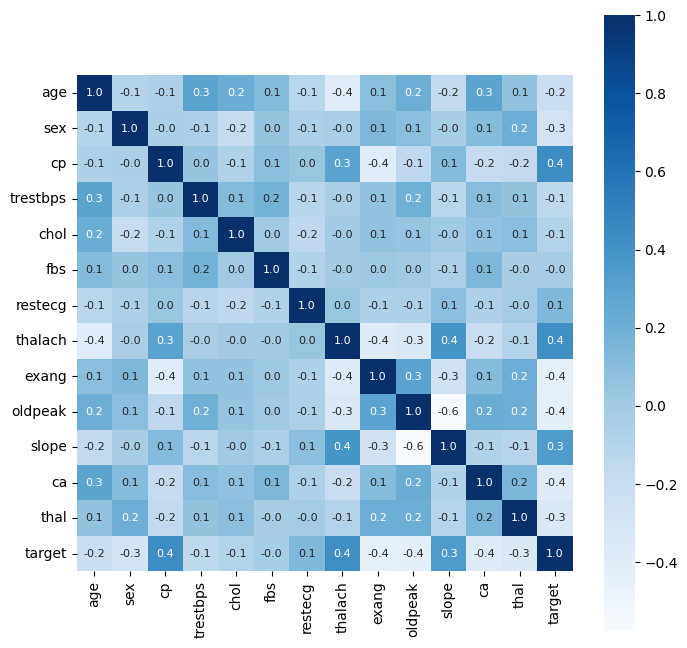

In [398]:
correlation =df.corr()
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

# **Exploratory Data Analysis (EDA)**

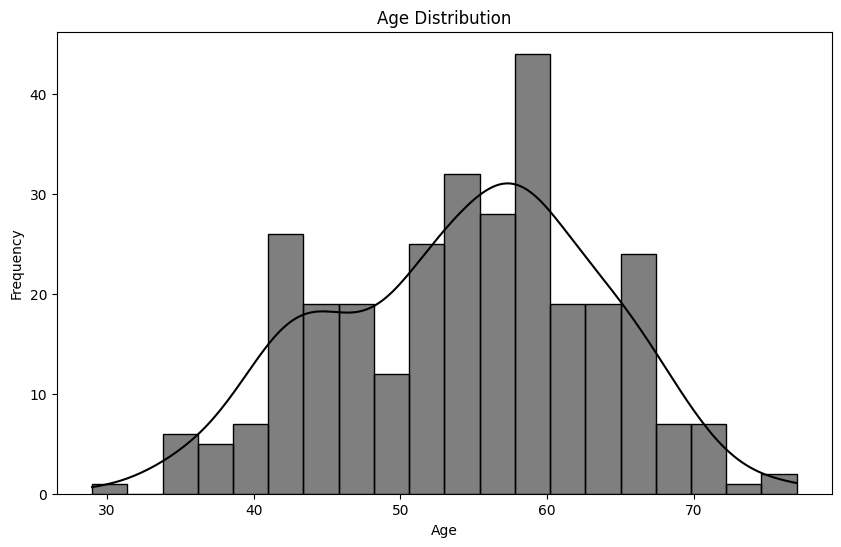

In [399]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='black')  # اللون الذهبي
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

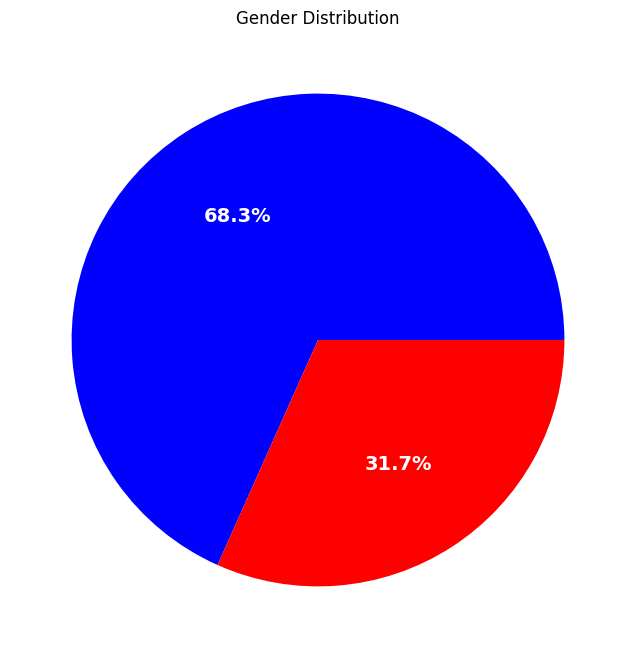

In [400]:
plt.figure(figsize=(8, 8))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], labels=['Female', 'Male'], textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'})
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

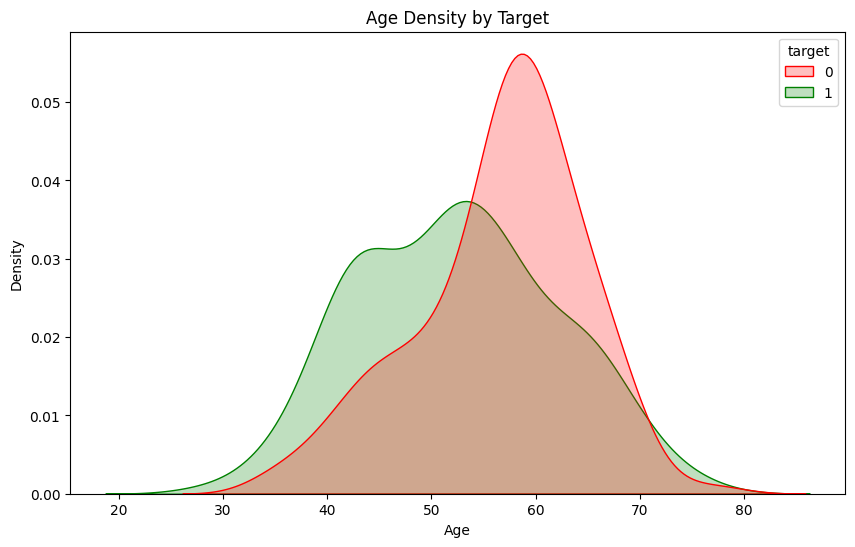

In [401]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='target', fill=True, common_norm=False, palette=['red', 'green'])  # لون حليبي ولون آخر
plt.title('Age Density by Target')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

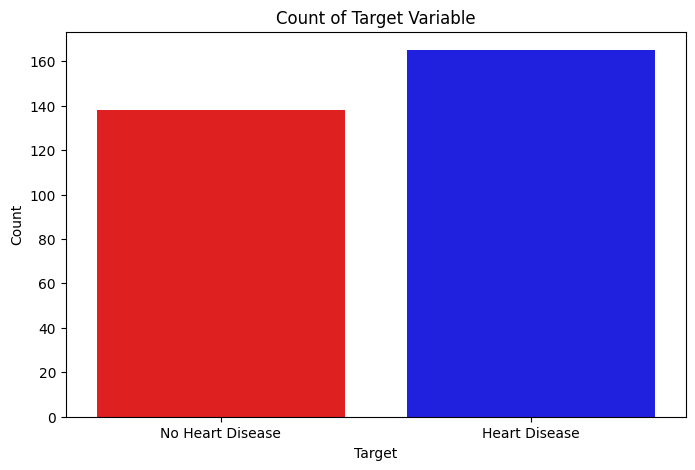

In [402]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', hue='target', data=df, palette={0: 'red', 1: 'blue'}, legend=False)  # لون أحمر ولون أزرق
plt.title('Count of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])  # تسميات واضحة
plt.show()

# **Splitting the Features and Target**

In [403]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [404]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [405]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64



# **Splitting the Data into Training data & Test Data**

In [406]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [407]:
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


# **Model Training: Logistic Regression**

In [408]:
model=LogisticRegression()

In [409]:
# training the LogisticRegression model with Training data

model = LogisticRegression(max_iter=500)  # زود العدد هنا
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

# **Model Evaluation**

In [410]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [411]:
print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.8677685950413223


In [412]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [413]:
print('Accuracy on Test data :', test_data_accuracy)

Accuracy on Test data : 0.8688524590163934


In [414]:
joblib.dump(model, '/content/heart_disease_model.pkl')

['/content/heart_disease_model.pkl']

# **Building a Predictive System by using Gradio Interface**

In [389]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00


In [416]:
import pandas as pd
import gradio as gr
import joblib

# تحميل الموديل المدرب
model = joblib.load('/content/heart_disease_model.pkl')

def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    try:
        # تنظيم المدخلات في DataFrame
        input_data = pd.DataFrame({
            'age': [age],
            'sex': [sex],
            'cp': [cp],
            'trestbps': [trestbps],
            'chol': [chol],
            'fbs': [fbs],
            'restecg': [restecg],
            'thalach': [thalach],
            'exang': [exang],
            'oldpeak': [oldpeak],
            'slope': [slope],
            'ca': [ca],
            'thal': [thal]
        })

        # التنبؤ باستخدام الموديل
        predict = model.predict(input_data)  # استخدام المتغير model الذي يحمل الموديل المدرب
        return f'Predicted Heart Disease: {"Yes" if predict[0] == 1 else "No"}'
    except Exception as e:
        return f'Error: {str(e)}'

# واجهة Gradio
gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label='Age'),
        gr.Number(label='Sex (1 = male, 0 = female)'),
        gr.Number(label='Chest Pain Type (cp)'),
        gr.Number(label='Resting Blood Pressure (trestbps)'),
        gr.Number(label='Serum Cholestoral (chol)'),
        gr.Number(label='Fasting Blood Sugar (fbs)'),
        gr.Number(label='Resting Electrocardiographic Results (restecg)'),
        gr.Number(label='Maximum Heart Rate Achieved (thalach)'),
        gr.Number(label='Exercise Induced Angina (exang)'),
        gr.Number(label='Oldpeak Depression (oldpeak)'),
        gr.Number(label='Slope of Peak Exercise ST Segment (slope)'),
        gr.Number(label='Number of Major Vessels Colored by Fluoroscopy (ca)'),
        gr.Number(label='Thalassemia (thal)')
    ],
    outputs=gr.Textbox(label='Heart Disease Prediction'),
    title='Heart Disease Prediction',
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9b52ccc46772e0a395.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
